In [32]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
import scipy.io
import h5py
import mat73
from tqdm import tqdm 
import matplotlib.pyplot as plt

from pynwb import NWBHDF5IO

import pyarrow as pa
import pyarrow.parquet as pq

import torch

from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [33]:
animal_id = 'Jenkins'
session_id = '20090916'

file = h5py.File(f'/home/makki/data/NWB/000070/sub-Jenkins/sub-{animal_id}_ses-{session_id}_behavior+ecephys.nwb')
io = NWBHDF5IO(file=file, mode='r', load_namespaces=True)

/home/makki/anaconda3/envs/opium/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/makki/anaconda3/envs/opium/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [34]:
nwb = io.read()
nwb

,x,y,z,imp,location,filtering,group,group_name,gain,offset
id,,,,,,,,,,
1,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,"1 pynwb.ecephys.ElectrodeGroup at 0x140008753578128\nFields:\n description: array corresponding to device implanted at PMd\n device: Utah Array(PMd) pynwb.device.Device at 0x140008753435024\nFields:\n description: 96 channel utah array\n manufacturer: BlackRock Microsystems\n\n location: Caudal, dorsal Pre-motor cortex, Left hemisphere\n",1,1.0,0.0
2,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,"1 pynwb.ecephys.ElectrodeGroup at 0x140008753578128\nFields:\n description: array corresponding to device implanted at PMd\n device: Utah Array(PMd) pynwb.device.Device at 0x140008753435024\nFields:\n description: 96 channel utah array\n manufacturer: BlackRock Microsystems\n\n location: Caudal, dorsal Pre-motor cortex, Left hemisphere\n",1,1.0,0.0
3,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,"1 pynwb.ecephys.ElectrodeGroup at 0x140008753578128\nFields:\n description: array corresponding to device implanted at PMd\n device: Utah Array(PMd) pynwb.device.Device at 0x140008753435024\nFields:\n description: 96 channel utah array\n manufacturer: BlackRock Microsystems\n\n location: Caudal, dorsal Pre-motor cortex, Left hemisphere\n",1,1.0,0.0
4,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,"1 pynwb.ecephys.ElectrodeGroup at 0x140008753578128\nFields:\n description: array corresponding to device implanted at PMd\n device: Utah Array(PMd) pynwb.device.Device at 0x140008753435024\nFields:\n description: 96 channel utah array\n manufacturer: BlackRock Microsystems\n\n location: Caudal, dorsal Pre-motor cortex, Left hemisphere\n",1,1.0,0.0
,x,y,z,imp,location,filtering,group,group_name,gain,offset
id,,,,,,,,,,
1,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,"1 pynwb.ecephys.ElectrodeGroup at 0x140008753578128\nFields:\n description: array corresponding to device implanted at PMd\n device: Utah Array(PMd) pynwb.device.Device at 0x140008753435024\nFields:\n description: 96 channel utah array\n manufacturer: BlackRock Microsystems\n\n location: Caudal, dorsal Pre-motor cortex, Left hemisphere\n",1,1.0,0.0
2,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,"1 pynwb.ecephys.ElectrodeGroup at 0x140008753578128\nFields:\n description: array corresponding to device implanted at PMd\n device: Utah Array(PMd) pynwb.device.Device at 0x140008753435024\nFields:\n description: 96 channel utah array\n manufacturer: BlackRock Microsystems\n\n location: Caudal, dorsal Pre-motor cortex, Left hemisphere\n",1,1.0,0.0
3,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,"1 pynwb.ecephys.ElectrodeGroup at 0x140008753578128\nFields:\n description: array corresponding to device implanted at PMd\n device: Utah Array(PMd) pynwb.device.Device at 0x140008753435024\nFields:\n description: 96 channel utah array\n manufacturer: BlackRock Microsystems\n\n location: Caudal, dorsal Pre-motor cortex, Left hemisphere\n",1,1.0,0.0


In [35]:
trialtable = nwb.trials.to_dataframe()
trialtable

,start_time,stop_time,target_presentation_time,go_cue_time,reaction_time,move_begins_time,move_ends_time,discard_trial,task_success,trial_type,...,correct_reach,maze_num_targets,maze_num_barriers,novel_maze,target_positions,frame_details,hit_target_position,target_size,barrier_info,timeseries
id,,,,,,,,,,,,,,,,,,,,,
0,8.853967,12.693967,9.751967,10.498967,0.375,10.830967,11.295967,0,1,6,...,1,3,9,0,"[[133, -81], [-118, -83], [-77, 82]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[133, -81]",13,"[[-33.0, 47.0, 6.0, 37.0], [-77.0, 48.0, 11.0, 61.0], [-64.0, -22.0, 66.0, 8.0], [-82.0, -115.0, 40.0, 5.0], [0.0, 104.0, 46.0, 11.0], [86.0, -40.0, 11.0, 20.0], [85.0, -96.0, 59.0, 6.0], [149.0, 110.0, 6.0, 51.0], [-76.0, -29.0, 40.0, 11.0]]","[(0, 3141, Eye pynwb.behavior.SpatialSeries at 0x140008415371920\nFields:\n comments: no comments\n conversion: nan\n data: <HDF5 dataset ""data"": shape (6821875, 2), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n reference_frame: screen center\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (6821875,), type ""<f8"">\n timestamps_unit: seconds\n unit: meters\n), (0, 3141, Hand pynwb.behavior.SpatialSeries at 0x140008798255184\nFields:\n comments: no comments\n conversion: nan\n data: <HDF5 dataset ""data"": shape (6821875, 2), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n reference_frame: screen center\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (6821875,), type ""<f8"">\n timestamps_unit: seconds\n unit: meters\n), (0, 3141, Cursor pynwb.behavior.SpatialSeries at 0x140008414357712\nFields:\n comments: no comments\n conversion: nan\n data: <HDF5 dataset ""data"": shape (6821875, 2), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n reference_frame: screen center\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (6821875,), type ""<f8"">\n timestamps_unit: seconds\n unit: meters\n)]"
1,17.774200,21.348967,18.490200,19.037200,0.340,19.346200,19.881200,0,1,2,...,1,3,8,0,"[[132, 56], [131, -55], [-118, -7]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[-118, -7]",13,"[[-64.0, -47.0, 113.0, 7.0], [-64.0, -39.0, 40.0, 17.0], [177.0, -3.0, 17.0, 23.0], [104.0, -1.0, 21.0, 40.0], [82.0, 36.0, 114.0, 8.0], [22.0, -62.0, 11.0, 62.0], [-145.0, -61.0, 7.0, 55.0], [-83.0, 53.0, 6.0, 16.0]]","[(3141, 2806, Eye pynwb.behavior.SpatialSeries at 0x140008415371920\nFields:\n comments: no comments\n conversion: nan\n data: <HDF5 dataset ""data"": shape (6821875, 2), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n reference_frame: screen center\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (6821875,), type ""<f8"">\n timestamps_unit: seconds\n unit: meters\n), (3141, 2806, Hand pynwb.behavior.SpatialSeries at 0x140008798255184\nFields:\n comments: no comments\n conversion: nan\n data: <HDF5 dataset ""data"": shape (6821875, 2), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n reference_frame: screen center\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (6821875,), type ""<f8"">\n timestamps_unit: seconds\n unit: meters\n), (3141, 2806, Cursor pynwb.behavior.SpatialSeries at 0x140008414357712\nFields:\n comments: no comments\n conversion: nan\n data: <HDF5 dataset ""data"": shape (6821875, 2), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n reference_frame: screen center\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (6821875,), type ""<f8"">\n timestamps_unit: seconds\n unit: meters\n)]"
2,22.143867,25.718733,22.941867,23.905867,0.335,24.200867,24.500867,0,1,2,...,1,1,0,0,"[[-118, -7]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[-118, -7]",13,[],"[(5947, 3056, Eye pynwb.behavior.SpatialSeries at 0x140008415371920\nFields:\n comments: no comments\n conversion: nan\n data: <HDF5 dataset ""data"": shape (6821875, 2)

In [36]:
n_trials = len(trialtable)
print(n_trials)
n_neurons = nwb.units.to_dataframe()['spike_times'].shape[0]
print(n_neurons)

2265
192


In [37]:
trialtable.correct_reach.value_counts()

correct_reach
1    1379
0     886
Name: count, dtype: int64

In [38]:
trialtable[trialtable.maze_condition != 0].correct_reach.value_counts()

correct_reach
1    1379
0      36
Name: count, dtype: int64

In [39]:
for column in trialtable.columns:
    print(column)

start_time
stop_time
target_presentation_time
go_cue_time
reaction_time
move_begins_time
move_ends_time
discard_trial
task_success
trial_type
trial_version
proto_trial
maze_condition
correct_reach
maze_num_targets
maze_num_barriers
novel_maze
target_positions
frame_details
hit_target_position
target_size
barrier_info
timeseries


In [40]:
def pos_to_vel(pos, dt):
    
    dx = np.diff(pos[0, :])
    dy = np.diff(pos[1, :])
    
    vx = dx / dt
    vy = dy / dt
    
    return np.column_stack((vx, vy))

In [ ]:
data = {
    'animal_id': [],
    'session_id': [],
    'trial_id': [],
    'spikes': [],
    'hand_pos': [],
    'cursor_pos': [],
    'hand_vel': [],
    'cursor_vel': [],
    #'typical_reach': [],
    #'mean_reach': [],
    'reach_angle_rad': [],
    'reach_angle_deg': [],
    'reach_color': [],
}

info = {
    'animal_id': [],
    'session_id': [],
    'trial_id': [],
    'correct_reach': [],
    'task_success': [],
}

maze = {
    'animal_id': [],
    'session_id': [],
    'trial_id': [],
    'trial_type': [],
    'trial_version': [],
    'maze_condition': [],
    'maze_num_targets': [],
    'maze_num_barriers': [],
    'targets_position':[],
    'true_target': [],
    'target_size': [],
}

events = {
    'animal_id': [],
    'session_id': [],
    'trial_id': [],
    'start_time': [],
    'stop_time': [],
    'trial_len': [],
    'target_on_time': [],
    'gocue_on_time': [],
    'move_starts_time': [],
    'move_ends_time': [],
    'delay_time': [],
    'reaction_time': [],
    'movement_exec_time': [],
}

neurons = nwb.units.to_dataframe()['spike_times'] # Neuron id x Spike Time
hand = nwb.processing['behavior'].data_interfaces['Position'].spatial_series['Hand'].data[:] # x, y 
cursor = nwb.processing['behavior'].data_interfaces['Position'].spatial_series['Cursor'].data[:] # x, y
session_time = np.round(nwb.processing['behavior'].data_interfaces['Position'].spatial_series['Hand'].timestamps[:] + 0.0001, decimals=3)

for trial_id in tqdm(range(0, n_trials)):
    
    """defining the grid/mask for trial"""
    dt = 0.001 #seconds
    
    min_T = np.round(trialtable['start_time'][trial_id], decimals=3) # Trial start time
    max_T = np.round(trialtable['stop_time'][trial_id], decimals=3) # Trial end time
    
    mi = np.nonzero(session_time > min_T)[0][0]
    ma = np.nonzero(session_time < max_T)[0][-1]

    grid = np.round(np.arange(min_T, max_T + dt, dt), decimals=3)
    n_bins = len(grid)
    
    """fill spiking and behavioral data"""
    
    spikes = np.zeros((n_bins, n_neurons))
    for n in range(n_neurons):
        spikes[:, n] = np.isin(grid, np.round(neurons[n], decimals=3)).astype(int)
    
    hand_pos = np.zeros((n_bins, 2))
    _, hand_pos[:, 0] = np.histogram(hand[mi:ma, 0], bins=n_bins-1)
    _, hand_pos[:, 1] = np.histogram(hand[mi:ma, 1], bins=n_bins-1)
    
    cursor_pos = np.zeros((n_bins, 2))
    _, cursor_pos[:, 0] = np.histogram(cursor[mi:ma,0], bins=n_bins-1)
    _, cursor_pos[:, 1] = np.histogram(cursor[mi:ma,1], bins=n_bins-1)
    
    hand_vel = pos_to_vel(hand_pos, dt)
    cursor_vel = pos_to_vel(cursor_pos, dt)

    #reach_angle_rad = np.atan2(hand_pos[-1, 0], hand_pos[-1, 1])
    reach_angle_rad = torch.atan2(torch.tensor(hand_pos[-1, 0]), torch.tensor(hand_pos[-1, 1])).numpy().astype(float)
    reach_angle_deg = np.rad2deg(reach_angle_rad) + 360 / 2
    reach_color = plt.cm.hsv(reach_angle_rad / (2 * np.pi) + 0.5)
    
    """fill trial info / meta data"""
    task_success = trialtable['task_success'][trial_id]
    correct_reach = trialtable['correct_reach'][trial_id]
    
    """fill maze info"""
    trial_type = trialtable['trial_type'][trial_id]
    trial_version = trialtable['trial_version'][trial_id]
    maze_condition = trialtable['maze_condition'][trial_id]
    num_targets = trialtable['maze_num_targets'][trial_id]
    num_barriers = trialtable['maze_num_barriers'][trial_id]
    targets_pos = trialtable['target_positions'][trial_id]
    target_size = trialtable['target_size'][trial_id]
    true_target = trialtable['hit_target_position'][trial_id]
    
    """fill events and timing data"""
    start_time = np.round(trialtable['start_time'][trial_id], decimals=3)
    stop_time = np.round(trialtable['stop_time'][trial_id], decimals=3) - start_time
    trial_len = stop_time
    target_on_time = np.round(trialtable['target_presentation_time'][trial_id], decimals=3) - start_time
    gocue_on_time = np.round(trialtable['go_cue_time'][trial_id], decimals=3) - start_time
    move_starts_time = np.round(trialtable['move_begins_time'], decimals=3) - start_time
    move_ends_time = np.round(trialtable['move_ends_time'][trial_id], decimals=3) - start_time
    move_exec_time = move_ends_time - move_starts_time
    reaction_time = np.round(trialtable['reaction_time'][trial_id], decimals=3)
    delay_time = gocue_on_time - target_on_time

    data['animal_id'].append(animal_id)
    data['session_id'].append(session_id)
    data['trial_id'].append(trial_id)
    data['spikes'].append(torch.tensor(spikes, dtype=torch.float32))
    data['hand_pos'].append(torch.tensor(hand_pos, dtype=torch.float32))
    data['cursor_pos'].append(torch.tensor(cursor_pos, dtype=torch.float32))
    data['hand_vel'].append(torch.tensor(hand_vel, dtype=torch.float32))
    data['cursor_vel'].append(torch.tensor(cursor_vel, dtype=torch.float32))
    data['reach_angle_rad'].append(reach_angle_rad)
    data['reach_angle_deg'].append(reach_angle_deg)
    data['reach_color'].append(reach_color)
    
    info['animal_id'].append(animal_id)
    info['session_id'].append(session_id)
    info['trial_id'].append(trial_id)
    info['correct_reach'].append(correct_reach)
    info['task_success'].append(task_success)
    
    events['animal_id'].append(animal_id)
    events['session_id'].append(session_id)
    events['trial_id'].append(trial_id)
    events['start_time'].append(start_time)
    events['stop_time'].append(stop_time)
    events['trial_len'].append(stop_time)
    events['target_on_time'].append(target_on_time)
    events['gocue_on_time'].append(gocue_on_time)
    events['move_starts_time'].append(gocue_on_time)
    events['move_ends_time'].append(gocue_on_time)
    events['delay_time'].append(delay_time)
    events['reaction_time'].append(reaction_time)
    events['movement_exec_time'].append(move_exec_time)
    
    maze['animal_id'].append(animal_id)
    maze['session_id'].append(session_id)
    maze['trial_id'].append(trial_id)
    maze['trial_type'].append(trial_type)
    maze['trial_version'].append(trial_version)
    maze['maze_condition'].append(maze_condition)
    maze['maze_num_targets'].append(num_targets)
    maze['maze_num_barriers'].append(num_barriers)
    maze['targets_position'].append(targets_pos)
    maze['true_target'].append(true_target)
    maze['target_size'].append(target_size)

In [ ]:
data_df = pd.DataFrame(data)
info_df = pd.DataFrame(info)
events_df = pd.DataFrame(events)
maze_df = pd.DataFrame(maze)

In [ ]:
dataset = df_concat = pd.concat([data_df, info_df, events_df, maze_df], axis=1)

In [45]:
dataset = dataset[dataset.task_success == 1]
typ = dataset[dataset.correct_reach == 1]
dev = dataset[dataset.correct_reach == 0]

typ['reaction_time'] = typ.reaction_time + typ.start_time
dev['reaction_time'] = dev.reaction_time + dev.start_time

/tmp/ipykernel_4003190/2553679568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typ['reaction_time'] = typ.reaction_time + typ.start_time
/tmp/ipykernel_4003190/2553679568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev['reaction_time'] = dev.reaction_time + dev.start_time


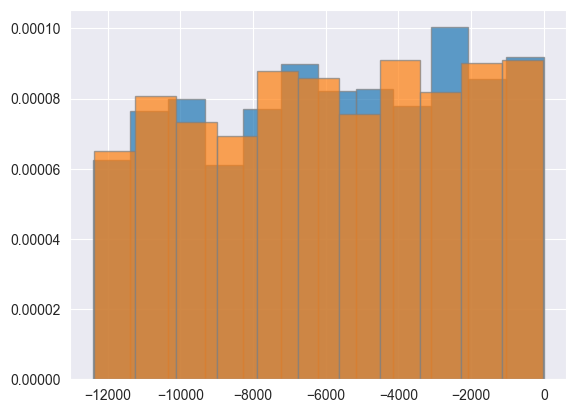

In [43]:
plt.hist(typ.reaction_time, bins='auto', density=True, alpha=0.7, edgecolor='gray')
plt.hist(dev.reaction_time, bins='auto', density=True, alpha=0.7, edgecolor='gray')
plt.show()

In [ ]:
for column in trialtable.columns:
    print(column)

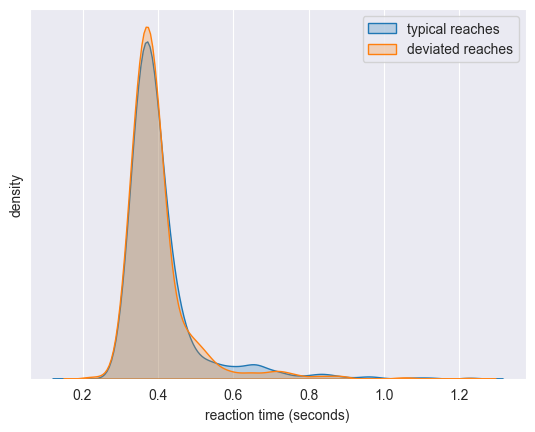

In [46]:
typ_rt = trialtable[(trialtable.correct_reach == 1)].reaction_time.values
dev_rt = trialtable[(trialtable.correct_reach == 0)].reaction_time.values

sns.kdeplot(typ_rt, fill=True, label='typical reaches')
sns.kdeplot(dev_rt, fill=True, label='deviated reaches')

plt.title('')
plt.xlabel('reaction time (seconds)')
plt.ylabel('density')
plt.yticks([])
plt.legend()
plt.savefig('/home/makki/opium/output_figs/reaction_time.png')
plt.show()


In [ ]:
typ_delay = - trialtable[(trialtable.correct_reach == 1)].go_cue_time.values + trialtable[(trialtable.correct_reach == 1)].move_begins_time.values
dev_delay = - trialtable[(trialtable.correct_reach == 0)].go_cue_time.values + trialtable[(trialtable.correct_reach == 0)].move_begins_time.values

sns.kdeplot(typ_delay, fill=True, label='typical reaches')
sns.kdeplot(dev_delay, fill=True, label='deviated reaches')

plt.title('')
plt.xlabel('delay (seconds)')
plt.ylabel('density')
plt.legend()
plt.savefig('/home/makki/opium/output_figs/delay_time.png')
plt.show()

In [ ]:
typ_mv_exec = trialtable[(trialtable.correct_reach == 1)].move_ends_time.values - trialtable[(trialtable.correct_reach == 1)].move_begins_time.values
dev_mv_exec = trialtable[(trialtable.correct_reach == 0)].move_ends_time.values - trialtable[(trialtable.correct_reach == 0)].move_begins_time.values

sns.kdeplot(typ_mv_exec, fill=True, label='typical reaches')
sns.kdeplot(dev_mv_exec, fill=True, label='deviated reaches')

plt.title('')
plt.xlabel('movement execution time (seconds)')
plt.ylabel('density')
plt.yticks([])
plt.legend()
plt.savefig('/home/makki/opium/output_figs/movement_execution_time.png')
plt.show()

In [ ]:
typ_delay = trialtable[(trialtable.correct_reach == 1)].go_cue_time.values - trialtable[(trialtable.correct_reach == 1)].target_presentation_time.values
dev_delay = trialtable[(trialtable.correct_reach == 0)].go_cue_time.values - trialtable[(trialtable.correct_reach == 0)].target_presentation_time.values

sns.kdeplot(dev_delay, fill=True, label='deviated reaches')
sns.kdeplot(typ_delay, fill=True, label='typical reaches')

plt.title('')
plt.xlabel('delay (seconds)')
plt.ylabel('density')
plt.legend()
plt.savefig('/home/makki/opium/output_figs/delay_time.png')
plt.show()

In [ ]:
typ_mv_beg = trialtable[(trialtable.correct_reach == 1)].move_begins_time.values - trialtable[(trialtable.correct_reach == 1)].start_time.values
dev_mv_beg = trialtable[(trialtable.correct_reach == 0)].move_begins_time.values - trialtable[(trialtable.correct_reach == 0)].start_time.values

sns.kdeplot(typ_mv_beg, fill=True, label='typical reaches')
sns.kdeplot(dev_mv_beg, fill=True, label='deviated reaches')

plt.title('')
plt.xlabel('beginning of movement')
plt.ylabel('density')
plt.yticks([])
plt.legend()
plt.savefig('/home/makki/opium/output_figs/movement_begins.png')
plt.show()

In [ ]:
typ_mv_end = trialtable[(trialtable.correct_reach == 1)].move_ends_time.values - trialtable[(trialtable.correct_reach == 1)].start_time.values
dev_mv_end = trialtable[(trialtable.correct_reach == 0)].move_ends_time.values - trialtable[(trialtable.correct_reach == 0)].start_time.values

sns.kdeplot(typ_mv_end, fill=True, label='typical reaches')
sns.kdeplot(dev_mv_end, fill=True, label='deviated reaches')

plt.title('')
plt.xlabel('end of movement')
plt.ylabel('density')
plt.yticks([])
plt.legend()
plt.savefig('/home/makki/opium/output_figs/movement_ends.png')
plt.show()

In [ ]:
typ_trial_len = trialtable[(trialtable.correct_reach == 1)].stop_time.values - trialtable[(trialtable.correct_reach == 1)].start_time.values
dev_trial_len = trialtable[(trialtable.correct_reach == 0)].stop_time.values - trialtable[(trialtable.correct_reach == 0)].start_time.values

sns.kdeplot(typ_trial_len, fill=True, label='typical reaches')
sns.kdeplot(dev_trial_len, fill=True, label='deviated reaches')

plt.title('')
plt.xlabel('trial length')
plt.ylabel('density')
plt.yticks([])
plt.legend()
plt.savefig('/home/makki/opium/output_figs/trial_length.png')
plt.show()

In [ ]:
trialtable = trialtable.loc[trialtable.task_success == 1]
trialtable['trial_id'] = trialtable.index

typ_trials = trialtable[(trialtable.correct_reach == 1)]
dev_trials = trialtable[(trialtable.correct_reach == 0)]

typ_iti = [(trialtable.iloc[trial_id+1].start_time - typ_trials.loc[typ_trials.trial_id == trial_id].start_time).values[0] for trial_id in typ_trials.trial_id.values[:-1]]
dev_iti = [(trialtable.iloc[trial_id+1].start_time - dev_trials.loc[dev_trials.trial_id == trial_id].start_time).values[0] for trial_id in dev_trials.trial_id.values[:-1]]

sns.kdeplot(typ_iti, fill=True, label='typical reaches')
sns.kdeplot(dev_iti, fill=True, label='deviated reaches')

plt.title('')
plt.xlabel('inter-trial time')
plt.ylabel('density')
plt.yticks([])
plt.legend()
plt.xlim(right=20)
plt.savefig('/home/makki/opium/output_figs/intertrial_time.png')
plt.show()

In [ ]:
for trial_id in typ_trials.trial_id.values:
    print(trial_id)
    trialtable.iloc[trial_id+1].start_time
    typ_trials.loc[typ_trials.trial_id == trial_id].start_time

In [ ]:
for trial_id in dev_trials.trial_id.values:
    print(trial_id)
    trialtable.iloc[trial_id+1].start_time
    dev_trials.loc[dev_trials.trial_id == trial_id].start_time

In [ ]:
typ_n_barriers = trialtable[(trialtable.correct_reach == 1)].maze_num_barriers.values
dev_n_barriers = trialtable[(trialtable.correct_reach == 0)].maze_num_barriers.values

bar_width = 0.35
n = [str(i) for i in np.sort(trialtable.maze_num_barriers.unique())]

#np.unique(np.sort(typ_n_barriers), return_counts=True)[1]
#np.unique(np.sort(dev_n_barriers), return_counts=True)[1]

x = np.arange(len(n))
plt.bar(x+bar_width/2, np.array([488, 0, 0, 0, 0, 0, 0, 0, 613, 278]), bar_width, label='typical reaches', edgecolor='gray')
plt.bar(x-bar_width/2, np.array([ 94,   7,  17,  35,  39,  36,  15,   3, 408, 232]), bar_width, label='deviated reaches', edgecolor='gray')

# Customize the plot
plt.xlabel('maze num barriers')
plt.ylabel('# trial')
plt.title('')
plt.xticks(x, n)  # Set x-ticks to category labels
plt.legend()
plt.savefig('/home/makki/opium/output_figs/maze_num_barriers.png')
plt.show()

In [ ]:
typ_n_targets = trialtable[(trialtable.correct_reach == 1)].maze_num_targets.values
dev_n_targets = trialtable[(trialtable.correct_reach == 0)].maze_num_targets.values

bar_width = 0.35
n = [str(i) for i in np.sort(trialtable.maze_num_targets.unique())]

x = np.arange(len(n))

plt.bar(x+bar_width/2, np.unique(np.sort(typ_n_targets), return_counts=True)[1], bar_width, label='typical reaches', edgecolor='gray')
plt.bar(x-bar_width/2, np.unique(np.sort(dev_n_targets), return_counts=True)[1], bar_width, label='deviated reaches', edgecolor='gray')

# Customize the plot
plt.xlabel('maze num barriers')
plt.ylabel('# trial')
plt.title('')
plt.xticks(x, n)  # Set x-ticks to category labels
plt.legend()

# Show the plot
plt.show()